>
## Uganda Corona virus Confirmed Cases Vs Recoveries  

### By Ronald Mulyowa 

> My name is Ronald Mulyowa,  currently pursuing a  Data Analyst Nanodegree Program at Udacity.com.
 ### Inspiration
> To present visual insights to coronavirus daily data for my country Uganda.
> Practicing to learn more.
### Great thanks to  Johns Hopkins University for making this dataset available

In [35]:
# importing the necessary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
sns.set()

In [22]:
    ### Importing the corona virus dataset for analysis
    corona = pd.read_csv('covid_19_data.csv')
    corona.head()
 

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [23]:
## selecting my country uganda
# fist let me rename the heading colums
corona.rename(columns={'ObservationDate':'observation_date', 'Province/State':'state', 
                       'Country/Region':'country','Last Update':'last_update'}, inplace = True)
corona.head()


,SNo,observation_date,state,country,last_update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [24]:
del corona['SNo']

In [25]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26713 entries, 0 to 26712
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  26713 non-null  object 
 1   state             12882 non-null  object 
 2   country           26713 non-null  object 
 3   last_update       26713 non-null  object 
 4   Confirmed         26713 non-null  float64
 5   Deaths            26713 non-null  float64
 6   Recovered         26713 non-null  float64
dtypes: float64(3), object(4)
memory usage: 1.4+ MB


In [26]:
# converting the observation column to date
corona['observation_date'] = pd.to_datetime(corona['observation_date'])
## seting 


In [27]:
#  setting the observation date as index
corona = corona.set_index('observation_date')

In [28]:
uganda = corona.query("country =='Uganda'")
uganda.tail()

,state,country,last_update,Confirmed,Deaths,Recovered
observation_date,,,,,,
2020-05-15,NaN,Uganda,2020-05-16 02:32:19,203.0,0.0,63.0
2020-05-16,NaN,Uganda,2020-05-17 02:32:32,227.0,0.0,63.0
2020-05-17,NaN,Uganda,2020-05-18 02:32:21,227.0,0.0,63.0
2020-05-18,NaN,Uganda,2020-05-19 02:32:18,248.0,0.0,63.0
2020-05-19,NaN,Uganda,2020-05-20 02:32:19,260.0,0.0,63.0


In [29]:
del uganda['state']
del uganda['last_update']

In [30]:
uganda.shape

(60, 4)

In [31]:
uganda.head()

,country,Confirmed,Deaths,Recovered
observation_date,,,,
2020-03-21,Uganda,1.0,0.0,0.0
2020-03-22,Uganda,1.0,0.0,0.0
2020-03-23,Uganda,9.0,0.0,0.0
2020-03-24,Uganda,9.0,0.0,0.0
2020-03-25,Uganda,14.0,0.0,0.0


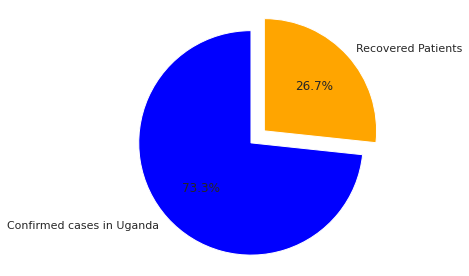

In [42]:
## viewing percentage of confimed cases vs recoveries
confirmed = uganda.Confirmed.sum()
recovered = uganda.Recovered.sum()

## propotions for confiremed  and recoveries
proportions  = [confirmed, recovered]
# ploting them on a pie chart
plt.pie(proportions,
       # adding labels
       labels = ['Confirmed cases in Uganda', 'Recovered Patients'],
       shadow = False,
       colors = ['blue', 'orange'],
        # one slide will explode out
        explode = (0.16,0),
        startangle = 90,
        # listing the percentage
        autopct = '%1.1f%%'      
     
)
# view the plot drop
plt.axis('equal')

plt.title = (" Confiremed cases in uganda vs Recoveries")
plt.tight_layout()
plt.show()




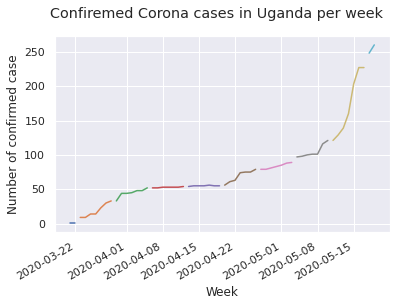

In [54]:
# grouping the data per week to know how we have been fairing per week
uganda_week = uganda.groupby('country').resample('W')
uganda_week.Confirmed.plot()
plt.suptitle('Confiremed Corona cases in Uganda per week')
plt.xlabel('Week')
plt.ylabel('Number of confirmed case')

plt.show()



In [39]:
del uganda_week['Deaths']

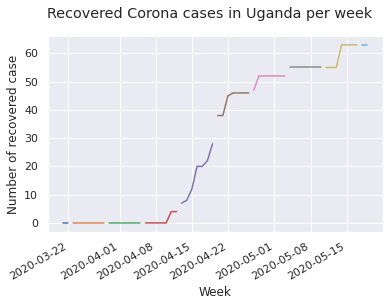

In [56]:
## Ploting recoveries
uganda_week = uganda.groupby('country').resample('W')
uganda_week.Recovered.plot()
plt.suptitle('Recovered Corona cases in Uganda per week')
plt.xlabel('Week')
plt.ylabel('Number of recovered case')

plt.show()
